In [1]:
# Import some necessary libraries
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Load
#### Programmatically download and load into your favorite analytical tool the transactions data.

In [2]:
!git clone https://github.com/CapitalOneRecruiting/DS.git

fatal: destination path 'DS' already exists and is not an empty directory.


In [3]:
from zipfile import ZipFile 

file_name = "DS/transactions.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir()      
    zip.extractall() 
    print('Unziped!') 

File Name                                             Modified             Size
transactions.txt                               2020-01-07 21:32:42    609937737
Unziped!


In [4]:
# Load the dataset
f = open('transactions.txt', 'r')
#readlines() output an list 
docs = []
d = f.readlines()

# use tqdm to add progress bars
for i in tqdm(range(len(d))):
    dic = json.loads(d[i])
    docs.append(dic)

df = pd.DataFrame(docs)
df.head()

100%|███████████████████████████████████████████████████████████████████████| 786363/786363 [00:10<00:00, 72507.71it/s]


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [5]:
#Save a local copy
df.to_csv('fraud.csv', index=False)

In [6]:
# df = pd.read_csv('fraud.csv')

#### Please describe the structure of the data. Number of records and fields in each record?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [8]:
# Let's replace "" with a None 'object' data. Pandas will auto convert None to NaN when the data type is 'float'.
for j in tqdm(df.columns):
    df[j] = df[j].map(lambda x: None if x =='' else x)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  3.98it/s]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

#### structure of the dataframe
* There are 786363 records and 29 fields.
* There are 4 numerical features, 3 boolean variables, and 22 objective features.
* "isFraud" is the target variable.
* 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd' are empty fields. Other fields have no missing values. 


#### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [10]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


#### discriptive statistics

* The average credit limit in this sample is 10759.46 dollar and the median is  7500.00 dollar. The minimum is 250.00 dollar and the maximum is 50000.00 dollar. 
* The average availabe money is 6250.73 dollar and the median is 3184.86 dollar. The minimum available money equals to -1005.63 dollar and maximum is 50000.00 dollar.
* The average transaction amount is 136.99 dollar and the median equals to 87.90 dollar The minimum transaction amount  is 0.00 dollar, the maximum is 2011.54 dollar.
* The average current balance is 4508.74 dollar, and the median equals to 2451.76 dollar. The minimum current balance among records is 0.00 dollar, the maximum is 47498.81 dollar.
* The mean values are larger than the mode values for all of the numerial features, which means their distributions are skewed to the right. The majority of the credit card transactions are small in dollar values, with high standard deviations.

In [11]:
print('There are {0:2d} number of unique customerId.'.format(df.customerId.nunique()))
print('There are {0:2d} number of unique accountNumber.'.format(df.accountNumber.nunique()))
print('There are {0:2d} number of unique creditLimit.'.format(df.creditLimit.nunique()))
print('There are {0:2d} number of unique cardLast4Digits.'.format(df.cardLast4Digits.nunique()))
print('There are {0:2d} number of unique merchantName.'.format(df.merchantName.nunique()))
print('There are {0:2d} number of unique merchantCountryCode.'.format(df.merchantCountryCode.nunique()))
print('There are {0:2d} number of unique merchantCategoryCode.'.format(df.creditLimit.nunique()))


There are 5000 number of unique customerId.
There are 5000 number of unique accountNumber.
There are 10 number of unique creditLimit.
There are 5246 number of unique cardLast4Digits.
There are 2490 number of unique merchantName.
There are  4 number of unique merchantCountryCode.
There are 10 number of unique merchantCategoryCode.


In [12]:
sum(df['customerId'] != df['accountNumber'])

0

* CustomerId and accountNumber are identical, therefore we only need to keep one of them in the modeling part. 
* There are more unique cards than unique customers, which mean that one customer may have multiple cards. 

#### Convert 'string' to 'datetime' type 

In [13]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [14]:
df.select_dtypes('datetime').columns.tolist()

['transactionDateTime',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange']

#### Missing values

In [15]:
# Delete a column if 80% of the data is missing
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.8].index
missing_features.tolist()

['echoBuffer',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'posOnPremises',
 'recurringAuthInd']

In [16]:
df.drop(missing_features, axis=1, inplace=True)

In [17]:
# Assign the label "missing" for the rest of the missing values.
df.fillna('missing', inplace = True)

## Question 2: Plot

#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column. Report any structure you find and any hypotheses you have about that structure.

Text(-9.075000000000003, 0.5, 'Number of Transactions')

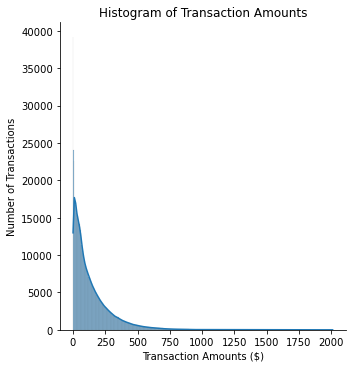

In [18]:
# seaborn histogram of Transaction Amounts
sns.displot(data = df, x ="transactionAmount",  kind = "hist", kde = True)        
             
# Add labels
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amounts ($)')
plt.ylabel('Number of Transactions')

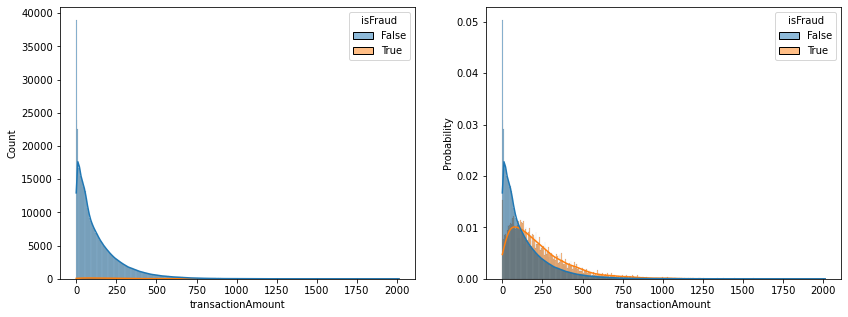

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x="transactionAmount", kde=True, hue = "isFraud", color="skyblue", ax=axs[ 0])
sns.histplot(data=df, x="transactionAmount", kde=True, hue = "isFraud", color="olive", ax=axs[1], stat="probability", common_norm=False)


In [20]:
print('The skewness of normal transactionAmount is {0:0.2f}.'.format(df[df.isFraud == False].transactionAmount.skew()))
print('The skewness of fraudulous transactionAmount is {0:0.2f}.'.format(df[df.isFraud == True].transactionAmount.skew()))


The skewness of normal transactionAmount is 2.10.
The skewness of fraudulous transactionAmount is 1.60.


In [21]:
 # stats of the transactionAmount by isFraud
df.loc[:,[ 'transactionAmount','isFraud']].groupby(['isFraud'])['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
False,773946.0,135.570249,146.525305,0.0,33.19,86.76,189.39,2011.54
True,12417.0,225.215905,189.551393,0.0,86.00,176.98,311.46,1608.35


In [22]:
print('Count of Fraud transactions: {0:2d}'.format(12417)) 
print('Proportions of Fraud transactions: {0:0.2f}%'.format(12417*100/786363)) 
print('Sum of Fraud transactions dollar amount: ${0:0.2f}'.format(df[df.isFraud].transactionAmount.sum()))
print('Proportions of Fraud transactions dollar amount: {0:0.2f}%'.format((100*df[df.isFraud].transactionAmount.sum())/(df.transactionAmount.sum())) )

Count of Fraud transactions: 12417
Proportions of Fraud transactions: 1.58%
Sum of Fraud transactions dollar amount: $2796505.89
Proportions of Fraud transactions dollar amount: 2.60%


 #### Observations
 This left histogram shows the counts of each transaction amounts. In order to see their distributions more clearly, the right histogram normalizes the bars so that their heights sum to 1.  
 
 * It's clear that the number of fraudulous transactions is much smaller than normal transactions. Fraudulous transactions only account for 1.58% of the total number of transactions. 
 
 * The distribution of fraudulous transactions is more skewed to the right than normal transactions. Both type of transactions are more frequent in small amounts, but the fraudlous transactions happen slightly more often than the normal transactions in the high valued transactions. 

* The average of normal transaction amounts is 135.57 dollars, which is less than the average of fraudulous transaction amounts(225.22 dollars). 

* Half of the normal transaction amounts is under 86.76 dollars, which is much less than that of fraudulous transactions(176.98 dollars). Meanwhile, 25% of normal transaction amounts is above 189 dollars, while 25% of fraudulous transaction amounts is above 311 dollars. 

* Proportions of fraudulous transactions among all transactions is  1.58%. And fraudulous transactions take up 2.60% of the whole transactions in dollar value. 

* There aren't many fraudulous transactions below 100 dollars, as it's probabaly not worth the effort and the risk.


#### Right skewness and Box-Cox transformation
To deal with right skewness, I can use take some transformations to the original transactionAmount. 

In [23]:
import scipy as sp

# add a small positive number, as box-cox transformation needs positive numbers.
df['transactionAmount_t'] = df['transactionAmount'] + 1e-9
df['transactionAmount_t'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(df['transactionAmount_t'], alpha=0.01)

Skewness of transactionAmount: 2.09
Skewness of transactionAmount after Box-Cox transformation: -0.39


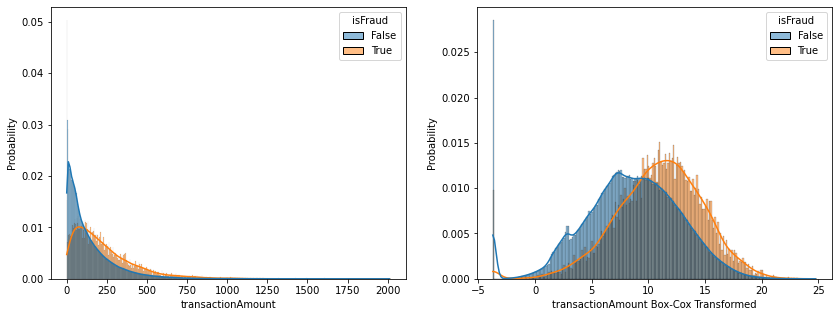

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x="transactionAmount", kde=True, hue = "isFraud", color="skyblue", ax=axs[ 0], stat="probability", common_norm=False)
sns.histplot(data=df, x="transactionAmount_t", kde=True, hue = "isFraud", color="olive", ax=axs[1], stat="probability", common_norm=False)

axs[1].set(xlabel = 'transactionAmount Box-Cox Transformed')
print('Skewness of transactionAmount: {0:0.2f}'.format(df.transactionAmount.skew()))
print('Skewness of transactionAmount after Box-Cox transformation: {0:0.2f}'.format(df.transactionAmount_t.skew()))

## Question 3: Data Wrangling - Duplicate Transactions

- Can you programmatically identify reversed and multi-swipe transactions?


- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)


- Did you find anything interesting about either kind of transaction?

#### Reversal Transactions: 


In [25]:
df= pd.concat( [pd.get_dummies(df['transactionType']), df], axis= 1)

In [26]:
print("Total transaction counts for reversed transactions:{0:2d}".format(df.loc[df['REVERSAL'] == 1]['transactionAmount'].count()))
print("Total transaction amount for reversed transactions: {0:0.2f}".format(df.loc[df['REVERSAL'] == 1]['transactionAmount'].sum()))

Total transaction counts for reversed transactions:20303
Total transaction amount for reversed transactions: 2821792.50


#### Observations:
* There are 20303 number of reversal transactions, with a total amount of 2821792.50 dollars.
* currentBalance after a reversed transaction = currentBalance + (reversal) transactionAmount
* availableMoney after a reversed transaction = availableMoney - (reversal) transactionAmount 

Common reasons for reversal transations:
- The item ended up being sold out.
- The customer canceled or returned the order.
- The wrong amount or item was charged.
- The transaction was duplicate.
- The customer was trying to fraud.

#### Multi-swiped Transactions:

Step to identify muti-swiped transactions
* Sort the dataframe first by 'transactionDateTime' in ascending order. 
* Group the dataframe by 'customerId', 'merchantName', 'transactionAmount','cardLast4Digits'.
* When a successive transaction within a same group happened in less than 5 minutes, I regard it as a multi swiped. 

In [27]:
df.columns

Index(['ADDRESS_VERIFICATION', 'PURCHASE', 'REVERSAL', 'missing',
       'accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'transactionAmount_t'],
      dtype='object')

In [28]:
# Notice that for ADDRESS_VERIFICATION, the transactionAmount is 0. We need to exclude this type.
# Also notice that reversal transactions and multi-swiped transactions may share the same transaction amount, 
# but they affect the current balance differently. We also need to exclude the REVERSAL type.  
# For a MISSING type, we cannot tell if it's a multi-swipe purchase or an immediate reversal. 
# Therefore I only consider the transaction type 'purchase' for multi_swipe.
df_multi_swiped = df.loc[(df.transactionType == 'PURCHASE') ,['customerId', 'merchantName', 'transactionAmount','cardLast4Digits','transactionDateTime']]
df_multi_swiped['multi_swiped'] = (df_multi_swiped.sort_values(['transactionDateTime'])                        
                        .groupby(['customerId', 'merchantName', 'transactionAmount','cardLast4Digits'], sort = False)['transactionDateTime']
                        .diff()
                        .dt.total_seconds()
                        .lt(300))                     


In [29]:
print("Total transaction counts for multi_swiped purchase within 5 minutes: {0:2d} ". format(df_multi_swiped[df_multi_swiped.multi_swiped == True]['transactionAmount'].count()))
print("Total transaction amount for multi_swiped purchase within 5 minutes: {0:0.2f} ". format(df_multi_swiped[df_multi_swiped.multi_swiped == True]['transactionAmount'].sum()))

Total transaction counts for multi_swiped purchase within 5 minutes: 7449 
Total transaction amount for multi_swiped purchase within 5 minutes: 1102920.99 


#### Observations:
- There are 7749 multi-swiped purchase within 5 minutes, with a total amount of 1102920.99  dollars.

Common reasons for multi-swiped transactions:
- The customer purchased the same item in a short span of time.
- The pos machine had some errors.
- It was a fraud.
Since I belive that multi_swiped transactions can be a good indicator for fraud transctions, I will include this feature and merge it to the original dataframe.

In [30]:
df = pd.merge(df,df_multi_swiped,on=['customerId', 'merchantName', 'transactionAmount','cardLast4Digits',
                                 'transactionDateTime'],
                                            how='left').fillna(False)

To analyze more about the duplicated transactions. I will look into the relationship of duplicated transactions with fraud and merchant categories.

In [31]:
df.loc[df['REVERSAL']==1].isFraud.value_counts()

False    19966
True       337
Name: isFraud, dtype: int64

In [32]:
 df.loc[df['multi_swiped']==True].isFraud.value_counts()

False    7321
True      129
Name: isFraud, dtype: int64

In [33]:
print('{0:0.2f}% of the frauds are duplicated transactions'.format((337+231)*100/len(df[df['isFraud']==True])))

4.57% of the frauds are duplicated transactions


In [34]:
def cat_plot(y, hue, orient, data, name):
    g =  sns.catplot(y = y, hue= hue, kind="count",
            palette="pastel", edgecolor=".6",
            data=data, height= 6, aspect= 1)
    ax = g.facet_axis(0,0)
    ax.set(title = 'Catplot of %s in %s'%(y,name) )
    tot = len(data)
    for p in ax.patches:
        width = p.get_width() # get bar length
        ax.text(width + 10,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}%'.format(width/tot*100), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    plt.show()


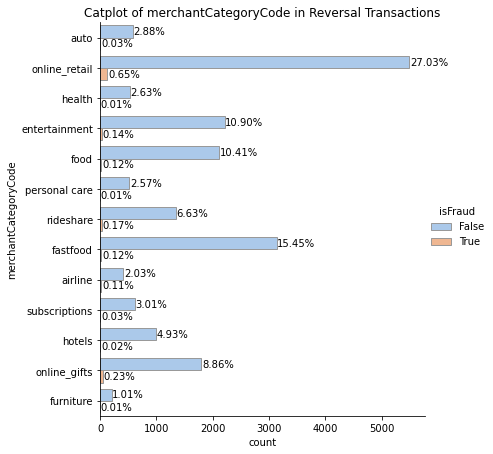

posx and posy should be finite values
posx and posy should be finite values


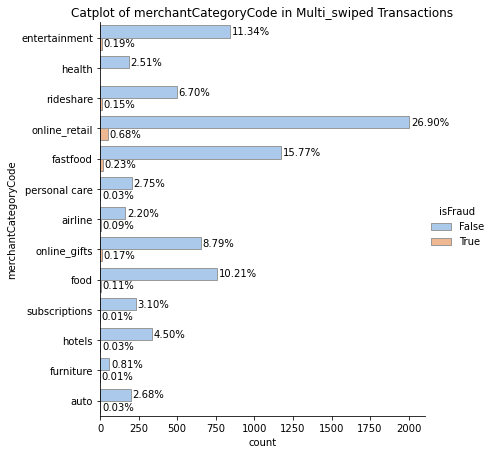

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


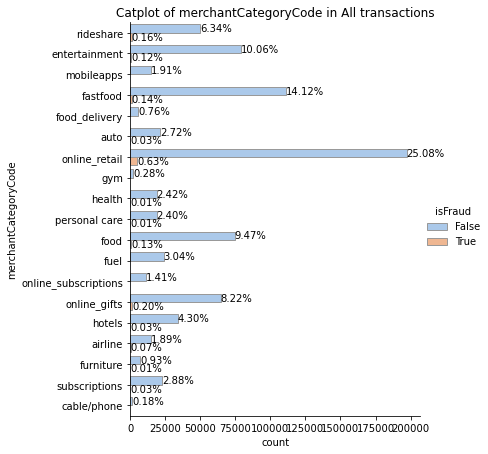

In [35]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    cat_plot('merchantCategoryCode', 'isFraud','h',df[df['REVERSAL']== 1],'Reversal Transactions')
    cat_plot('merchantCategoryCode', 'isFraud','h',df[df['multi_swiped']== True], 'Multi_swiped Transactions')
    cat_plot('merchantCategoryCode', 'isFraud','h',df,'All transactions')




#### Observations
* 337 reversal transactions were frauds. 
* 231 multi_swiped transactions were frauds.
* 4.57% of the frauds are duplicated transactions
* The top 3 categories for multi-swiped, reversal as well as all transactions are online-retails, fastfood and entertainment.
* The fraud rate in online-retails are similar for multi-swiped (0.68%), reversal(0.65%) and all transactions(0.63%).
* For fast-food, multi-swiped has the highest fraud rate (0.23%) among the three transaction types.  
* Otherwise the fraud rate are very similar.

## Feature Engineering

Here I listed all the feature engineering items in this project. Some of them have been done in previous parts.

- Change an account related date to days from the transaction date.
- Add dummy variables to indicate the specific weekday, hour, day and month. 
- Add a dummy variable to indiate holidays.
- Create a dummy variable to indiate multiswipe transactions.
- Create a dummy to see if the entered CVV matched the card CVV.
- Transform right skewed data (done for transactionAmount).
- Aggregations: total count and dollar amount of transactions within the past 3 days (done).
- One hot encoding on categorical data with a few categories.
- Mean (target) encoding on merchant names, merchant categories, customer ID, account number and card last 4 digits.




#### Date transfromation

In [36]:
# Change an account related date to days from the transaction date
from datetime import date

df['daysFromLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days
df['daysFromCurrentExpDate'] = (df['currentExpDate'] - df['transactionDateTime']).dt.days
df['daysFromAccountOpenDate'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days

In [37]:
#Add dummy variables to indicate the specific weekday, hour, day and month
df['weekday'] = df['transactionDateTime'].dt.weekday
df['hour'] = df['transactionDateTime'].dt.hour
df['day'] = df['transactionDateTime'].dt.day
df['month'] = df['transactionDateTime'].dt.month

In [38]:
# holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df['transactionDateTime'].min(), end=df['transactionDateTime'].max())
df['transaction_holiday'] = df['transactionDateTime'].isin(holidays)


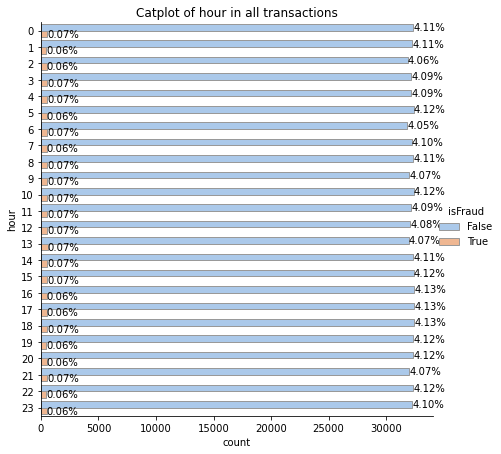

In [39]:
cat_plot('hour', 'isFraud','h',df,'all transactions')


For this sample, frauds didn't happen in any particular hour of a day. I would assume that normal transactions happen more often during business hours, and frauds happen more often in other times. Maybe the timezones are different.


#### Transform CVV

In [40]:
# Create a dummy to see if the entered CVV matched the card CVV.
df['matchedCVV'] = df['cardCVV']==df['enteredCVV']

In [41]:
df.drop(columns = ['cardCVV', 'enteredCVV'], axis = 1, inplace = True)


#### Sum of transaction amount in the last 24 hrs

Past transaction behaviors could be a good indicator for fraud or not. 

In [42]:
df1 = df.groupby(['accountNumber','transactionDateTime'], as_index=False)['transactionAmount'].sum()
trx1 = (df.set_index('transactionDateTime')
             .groupby('accountNumber')['transactionAmount']
             .rolling('1D')
             .sum()
             .groupby('accountNumber')
             .shift()
             .rename('trx_last_1_day')
         )   


In [43]:
df1 = df1.join(trx1, on=['accountNumber','transactionDateTime'])


#### Count of transactions in the last 24 hrs

In [44]:
df2 = df.groupby(['accountNumber','transactionDateTime'], as_index=False).count()
trx2 = (df2.set_index('transactionDateTime')
             .groupby('accountNumber')['transactionAmount']
             .rolling('1D')
             .count()
             .groupby('accountNumber')
             .shift()
             .rename('trx_count_last_1_day')
         )      


In [45]:
df1 = df1.join(trx2, on=['accountNumber','transactionDateTime'])

In [46]:
# add the aggragated data to the dataframe
df = pd.merge(df,df1,on=['transactionAmount','accountNumber',
                                 'transactionDateTime'],
                                            how='left')


In [47]:
fill_mode = lambda col: col.fillna(int(col.mode()[0]))
df[['trx_last_1_day', 'trx_count_last_1_day'] ]= df[['trx_last_1_day', 'trx_count_last_1_day']].apply(fill_mode, axis=0)

In [48]:
df.drop(columns = ['trx_last_1_day', 'trx_count_last_1_day'], inplace = True)

#### Box-cox transformation

In [49]:
import scipy as sp
df['availableMoney_t'] = (df['availableMoney']) + 1600
df['availableMoney_t'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(df['availableMoney_t'], alpha=0.01)

Skewness of availableMoney: 2.09
Skewness of availableMoney after Box-Cox transformation: 0.09


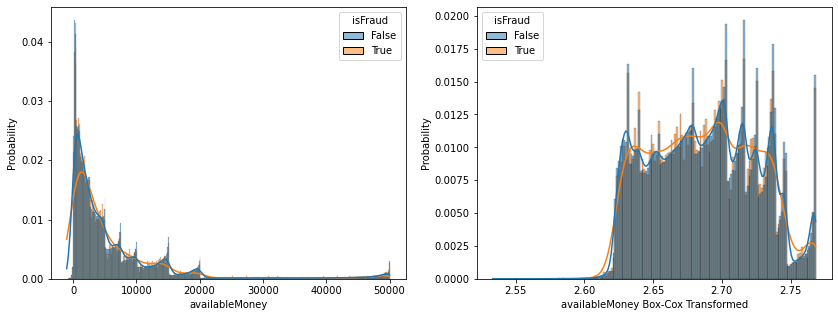

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x="availableMoney", kde=True, hue = "isFraud", color="skyblue", ax=axs[ 0], stat="probability", common_norm=False)
sns.histplot(data=df, x="availableMoney_t", kde=True, hue = "isFraud", color="olive", ax=axs[1], stat="probability", common_norm=False)

axs[1].set(xlabel = 'availableMoney Box-Cox Transformed')
print('Skewness of availableMoney: {0:0.2f}'.format(df.transactionAmount.skew()))
print('Skewness of availableMoney after Box-Cox transformation: {0:0.2f}'.format(df.availableMoney_t.skew()))

#### One Hot Encoding

In [51]:
dummies = ['posConditionCode', 'merchantCountryCode', 'acqCountry','merchantCategoryCode'
           , 'posEntryMode']
# already encoded transactionType earlier

In [52]:
df_dummy = pd.get_dummies(df[dummies])


In [53]:
dates = ['dateOfLastAddressChange',
 'currentExpDate',
 'accountOpenDate',
 'transactionDateTime']
non_encoding = list((set(df.columns)) - set(dummies) - set(dates) - {'transactionType'})
df_all = pd.concat([df_dummy, df[non_encoding]], axis=1)
print(df_all.shape)


(786363, 66)


In [54]:
df_all.to_csv('df_all.csv', index=False)

In [55]:
df_all = pd.read_csv('df_all.csv')

#### Mean (Target) Encoding
1. Group by the merchantName and obtain aggregated sum over the “isFraud” variable. 
2. Group by the merchantName and obtain aggregated count over the “isFraud” variable
3. Divide the step 1 / step 2 results and join it back.

I first encoded the whole sample in one step, then I realized that it's cherry picking, as I leak the fraud information in this variable. I should save the encoding map from the training set. In the test set, I refer to the encoding map, or use the global mean from the training set if it's a brand new new merchantName. 

I am using a simple mean encoding. Giving more time, I will add smoothing to avoid overfitting, as well as other encoding. 

In [56]:
sum(df_all['customerId'] != df_all['accountNumber'])

0

CustomerId and accountNumber are identical, therefore we only need to keep one of them. Let me keep accountNumber

In [57]:
#df_all.drop('customerId', axis = 1, inplace = True)
features = list(set(df_all.columns) - set(['isFraud','transactionAmount_t']))
X = df_all[features]
Y = df_all['isFraud']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25)

In [59]:
def encode_target_naive(df_train_naive, df_test_naive, cats):
    default = df_train_naive['isFraud'].mean()
    for v in cats:  
        encod_map = df_train.groupby(v)['isFraud'].mean()
        df_train_naive.loc[:, v] = df_train_naive[v].map(encod_map).fillna(default)
        df_test_naive.loc[:, v] = df_test_naive[v].map(encod_map).fillna(default)
    return df_train_naive, df_test_naive

In [60]:
df_train = pd.concat([X_train,y_train], axis = 1)
df_test =  pd.concat([X_test,y_test], axis = 1)
df_train, df_test= encode_target_naive(df_train,df_test, ['merchantName','accountNumber','cardLast4Digits'])
X_train = df_train[features]
y_train = df_train['isFraud']
X_test = df_test[features]
y_test = df_test['isFraud']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25)

## Question 4. Model:

### Unbalanced data
We have much more observations for non-fraud transactions than fraud transactions. To deal with this, I considered three aspects.
1. Sampling technique like oversampling and downsampling.
2. changing metrics ,not accuracy but precision, recall and F2 score.
3. Models that adapt to unbalanced data like boosting. 
 
    

#### Undersample the majority class and oversample the minority class.

In [61]:
import pandas as pd
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler,EditedNearestNeighbours
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.1, random_state =  42),
    RandomUnderSampler(sampling_strategy = 1, random_state = 42))

X_train_res, y_train_res = pipe.fit_resample(X_train, y_train)

In [62]:
import collections
counter = collections.Counter(y_train_res)
print(counter)

Counter({False: 43534, True: 43534})


### Metrics
We need to balance the cost of credit card frauds and the inconvience to the customers for false alarms. In this case, false negative has a higher cost. Although generally effective, the ROC Curve and ROC AUC can be over-optimistic when the number of observations in the minority class is small. Based on the two reasons, I will choose F2, recall and precision as the metrics. 

- Recall tells the percentage of Fraud cases that we caught
- Precision tells the percentage of Fraud predictions that were correct
- F2 put more weight on recall than precision

### Logistic Regression and Support Vector Classifier with Stochastic Gradient Decent
The class SGDClassifier implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [64]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True, class_weight = 'balanced'))
])

We'll conduct a grid search over several hyperparameter choices. The search uses 5-fold cross-validation with stratified folds. The type of linear classifier is chosen with the loss hyperparameter. For a linear SVC we set loss = 'hinge', and for logistic regression we set loss = 'log'.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [65]:
param_grid_sgd = [{
    'model__loss': ['log'], # logistic regression
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}
    , {
    'model__loss': ['hinge'], # SVC
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridSearchCV, uses StratifiedKFold with 5 folds for the train/validation splits. We'll use matthews_corrcoef (the Matthews correlation coefficient, MCC) as our scoring metric.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, fbeta_score, auc

In [67]:
fbeta_scorer = make_scorer(fbeta_score, beta= 2)

grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=fbeta_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [68]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [69]:
grid_sgd.best_score_

0.8990648039969905

In [70]:
grid_sgd.best_params_


{'model__alpha': 2.976351441631316,
 'model__loss': 'log',
 'model__penalty': 'l2'}

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score 
from sklearn import metrics
from matplotlib import pyplot
def evaluation(model, name, x_test, y_test, threshold):

    
    try:
        y_prob = model.predict_proba(x_test)[:,1] 
    except:
        y_prob = model.predict(x_test)
    y_pred_default = model.predict(x_test)
    y_pred = (y_prob >= threshold).astype(bool)
    
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F2:", metrics.fbeta_score(y_test, y_pred, beta = 2))
    
    print('*********************************************************************************')
     # PR curve
#     disp = plot_precision_recall_curve(model, xtest, ytest)
#     disp.ax_.set_title('2-class Precision-Recall curve')

    # calculate precision and recall for each threshold
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob)
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label= name)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()


    #Print Confusion Matrix
    plt.figure()
    cm = metrics.confusion_matrix(y_test, y_pred)
    labels = ['No Fraud', 'Fraud']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

Precision: 0.035812846946867566
Recall: 0.7274484536082474
F2: 0.14960379508652905
*********************************************************************************


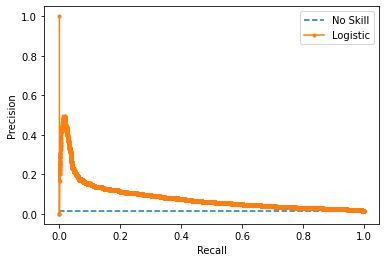

<Figure size 432x288 with 0 Axes>

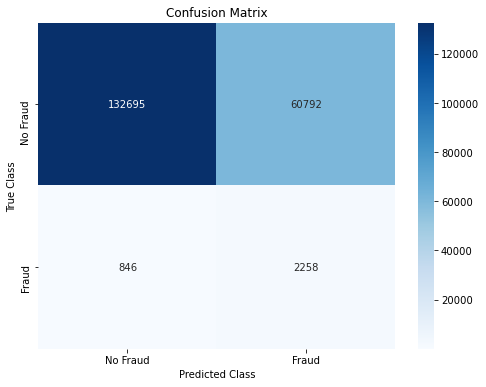

In [73]:
evaluation(grid_sgd, 'Logistic', X_test, y_test,0.5)

#### Observations
* The gradient decent classifier chose Logistic Regression over SVC. 
* What percent of the positive cases did I catch : the "recall" is 76.8%
* What percent of positive predictions were correct : the "precision" is 3.49%
* Logistic regression caught a fair amount of fraud, but it gave lots of false alarm, creating frictions for the card users. 


### Light Gradient Boost Machine
Boosting combines weak learners to create strong learners. LightGBM is a fast, distributed boosting method. 

In [74]:
import lightgbm as lgb
train_y, test_y = y_train_res, y_test
train_x, test_x = X_train_res, X_test

train_data=lgb.Dataset(train_x, label=train_y)
# customed defined metrics,using F2
def lgb_f2_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) 
    return 'f2', fbeta_score(y_true, y_hat, beta = 2), True

#Select Hyper-Parameters

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {'learning_rate': [0.07],
              'n_estimators': [8,16],
              'num_leaves': [20, 24, 27],
              'boosting_type' : ['gbdt'],
              'objective' : ['binary'],
              'random_state' : [501], 
              'colsample_bytree' : [0.64, 0.65],
              'subsample' : [0.7,0.75],
              #'reg_alpha' : [1, 1.2],
              #'reg_lambda' : [ 1.2, 1.4],
              }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(train_x, train_y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 400,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )





Fitting 4 folds for each of 24 candidates, totalling 96 fits
{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.07, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 501, 'subsample': 0.7}
0.8777966646758855
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 27, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 43534, number of negative: 43534
[LightGBM] [Warning] Auto-choosing row-wise multi-threa

Precision: 0.03967193709309208
Recall: 0.7557989690721649
F2: 0.16393900853936355
*********************************************************************************


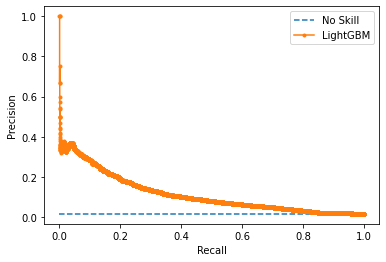

<Figure size 432x288 with 0 Axes>

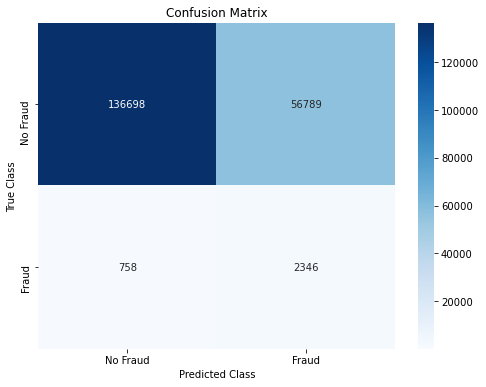

In [75]:
evaluation(lgbm, 'LightGBM', X_test, y_test,0.1)

#### Feature Importance

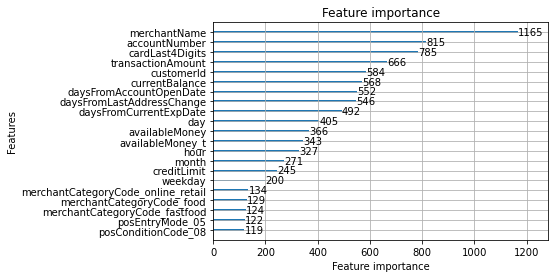

In [76]:
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#### Observations
* Feature Engineering and Resampling seem to did most of the work. Both Logistic and LightGBM give similar fraud prediction performance. They caught about 76% of the Frauds. But among the fraud alarms, only about 4% are correct. 
* For credit card frauds, we need to balance the loss of frauds and the inconvenience of faulse alarms. Since the loss of frauds is more important, we weight a high recall more than a high precision.
* From the feature importance figure, we can see that merchant names and card or account information are good predictors. We can infer that some merchant and customers are more vulnerable to frauds. For instance if someone's personal information was stolen, there might be multiple frauds on his account. Or some stores are less stricted in verifing identity when facing potential frauds. 
* Both of the aggregation features are quite important.  

#### If I have more time, I will:
* Dig more into feature:
- Information of last transaction: time since last transaction, previous amount of the transaction, previous location of the transaction.
- Transaction aggregation: group the transactions made during the last given humber of hours, first by cardID, then by transactionType, merchantCategoryCode, merchantCountryCode. A set of different time frame could be 1,3,6,12,18,24,72 and 168 h. Then I will calculate again the number of transactions and the total amount spent on those transactions.
- A binary feature if a new transaction time is within a certain confidence interval range using the periodic normal distribution. 
- A binary feature if a new transaction time is with in a certain confidence interval of the time of the previous transactions, say within previous week.
* Read some literatue and try more models.
* Fine tune models.

#### Thank you for your review and consideration!